# Corregir aberraciones cromáticas usando máscaras y HSV
## Mediante máscaras se detecta la aberración cromática y bajando la saturación se corrige

Objetivo: Corrección de aberraciones cromáticas.

Idea principal:
* Detección automática de la aberración mediante el uso de máscaras
* corrección mediante bajada de saturación de la imagen solo en las zonas indicadas por la máscara

Fuentes:
* https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html
* https://scikit-image.org/docs/dev/user_guide/getting_started.html
* https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary
* https://stackoverflow.com/questions/2612361/convert-rgb-values-to-equivalent-hsv-values-using-python

Atajos:
* https://cheatography.com/jorgejuan007/cheat-sheets/jupyter-notebook-atajos-de-teclado/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb

In [9]:
# esta celda es solo para ejecutarlo en local con la imagen peine (cuando se suba a Git se borra)
import os
data_dir = '/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1'
filename = os.path.join(data_dir, 'peine.png')
from skimage import io
peine = io.imread(filename)

In [2]:
# meter explicación de Nico sobre cómo se han tomado los parámetros para la máscara, foto y fuente

import cv2
import csv
import numpy as np


def create_mask(complete_path):
    bgr_img = cv2.imread(complete_path)
    hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)

    green_low = np.array([35, 100, 100])
    green_high = np.array([90, 255, 255])
    blue_low = np.array([110, 100, 100])
    blue_high = np.array([170, 255, 255])

    mask1 = cv2.inRange(hsv, green_low, green_high)
    mask2 = cv2.inRange(hsv, blue_low, blue_high)
    mask = cv2.add(mask1, mask2)
    return mask


In [7]:
import pandas as pd
import os
from skimage import io
from numpy import genfromtxt

def fix_ab_cromatica(rgb_img_dir, nombre_imagen):
    """
    El input debe ser EL PATH AL DIRECTORIO DE una imagen en formato rgb pero sin especificar su nombre
    e.g. rgb_img_path = '/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1'
         nombre_imagen = 'peine.png'
    """
    filename = os.path.join(rgb_img_dir, nombre_imagen)
    rgb_img = io.imread(filename)
    hsv_img = rgb2hsv(rgb_img)
    layer_shape = hsv_img[:,:,1].shape
    x_shape = layer_shape[0]
    y_shape = layer_shape[1]
    complete_path = rgb_img_dir + '/' + nombre_imagen
    mascara = create_mask(complete_path)
    for i in range(x_shape):
        for j in range(y_shape):
            if mascara[i][j] == 255:
                hsv_img[:,:,1][i][j] = 0
    rgb_img_fixed = hsv2rgb(hsv_img)
    return rgb_img_fixed

fixed_peine = fix_ab_cromatica('/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1', 
                               'peine.png')

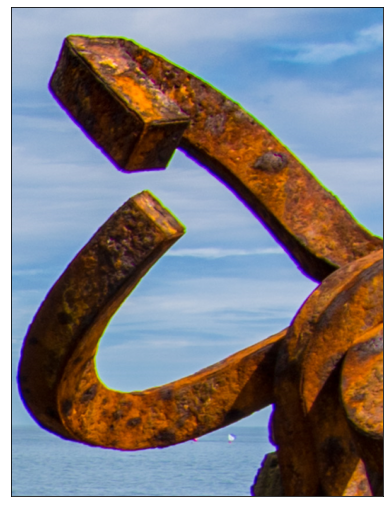

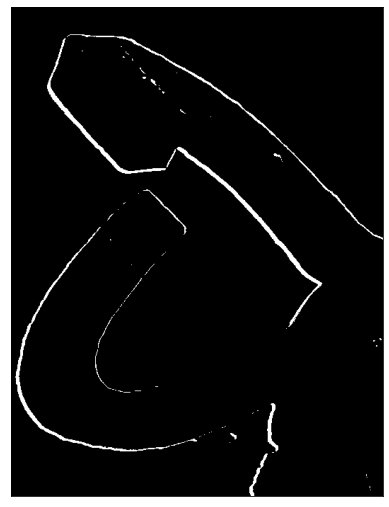

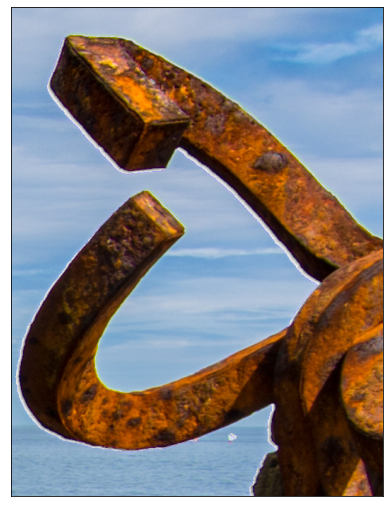

In [10]:
# Función sacada de LM 3 para mostrar resultados
#
def imshow(img):
    fig, ax = plt.subplots(figsize=(9, 9))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()
    
imshow(peine)
imshow(create_mask('/Users/alvaro/Documents/_PythonUNIR/_PC/PC_Actividades/ACT_1/Imagenes_ACT1/peine.png'))
imshow(fixed_peine)